## Sparks Foundations
### Batch: OCTOBER'21(Data Science and Business Analytics)
### Submitted By: Dev Ansodariya
### Task: Predict the Percentage of an Student based on the Number of Study hours.

#### 1. Importing libararies

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn import metrics

%matplotlib inline

#### Data Conversion


In [33]:
data =  {
         'Hours':  [2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8], 
         'Scores': [21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
        } 
df= pd.DataFrame(data= data)
df.sample(3)

,Hours,Scores
2,3.2,27
20,2.7,30
22,3.8,35


#### Correlating Data Points

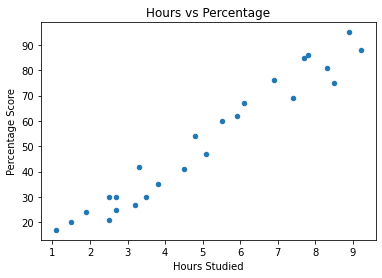

In [34]:
df.plot(x='Hours', y='Scores', kind='scatter')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
# plt.axis('off')
plt.show()

#### From Above Plot, We can see that there's positive relation between number of hours studied and percentage of score.

### Data Perparation 

In [35]:
# Splitting the Data into "Labels" and "Attributes".

x= df.iloc[:, :-1].values
y= df.iloc[:, 1].values  

In [36]:
# Splitting the Data into Train-Test Split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.15,
                                                  random_state= 0)

### Model Building

In [37]:
reg_model= LinearRegression(normalize=True)
reg_model.fit(x_train, y_train)

LinearRegression(normalize=True)

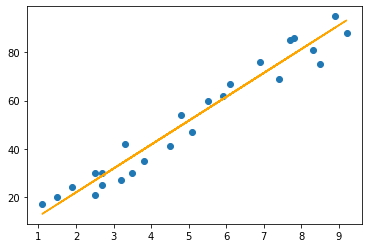

In [38]:
# Plotting Regression Line & Test-Line

reg_line = reg_model.coef_*x + reg_model.intercept_ 

plt.scatter(x,y)
plt.plot(x, reg_line, color='orange')
plt.show()

### Predicting the Values

In [39]:
print(x_test) # Testing data - In Hours
y_pred = reg_model.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]]


In [40]:
# Comparing Values

df_c = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_c

,Actual,Predicted
0,20,16.927148
1,27,33.788269
2,69,75.445158
3,30,26.845455


In [41]:
# Testing with non-test Data

hours = np.array(9.25).reshape(-1,1)
hours.reshape(-1,1)
own_pred = reg_model.predict(hours)
print("--> No of Hours = {}".format(hours))
print("--> Predicted Score = {}".format(own_pred[0]))

--> No of Hours = [[9.25]]
--> Predicted Score = 93.7940249035965


### Evaluating Performance of Model

In [42]:
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Accuracy: {(reg_model.score(x_test, y_pred))*100}%")

Mean Absolute Error: 4.8652060192653295
Accuracy: 100.0%


### Thank You :)